In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
import os
path =r"C:\Users\KHAN\Desktop\assignment of python"
os.listdir(path)

['.ipynb_checkpoints',
 'resubmission.ipynb',
 'Sales-April.csv',
 'Sales-Februrary.csv',
 'Sales-January.csv',
 'Sales-March.csv',
 'Sales-May.csv']

In [29]:
files =[file for file in os.listdir(path) if not file.startswith('.')]
all_data =pd.DataFrame()

for file in files:
    raw_data=pd.read_csv(path+'/'+file,encoding='latin1')
    all_data =pd.concat([all_data ,raw_data],ignore_index=True,axis=0)
    
all_data .to_csv('all_data.csv',index=False)

In [30]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount


In [45]:
all_data = all_data.dropna(how="all")
all_data.head(500)

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount,day,month,year
0,Patrick Graham,Washington,West,Jeremy Baker,2016-04-01,Junk,8,12.42,99.36,1,4,2016
1,Frances Warren,New Jersey,East,Albert Dunn,2016-04-01,Widgets,9,53.35,480.15,1,4,2016
2,Sara Snyder,New York,East,Robert Hayes,2016-04-01,Junk,4,12.42,49.68,1,4,2016
3,Randy Watson,New York,East,Cheryl Riley,2016-04-01,Widgets,5,53.35,266.75,1,4,2016
4,Randy Watson,New Jersey,East,Kimberly Coleman,2016-04-01,Widgets,2,53.35,106.70,1,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Patrick Graham,Washington,West,Karen Willis,2016-02-07,Junk,9,12.42,111.78,7,2,2016
496,Frances Warren,New Jersey,East,Russell Day,2016-02-07,Stuff,6,16.32,97.92,7,2,2016
497,Sara Snyder,Massachusetts,East,Susan Watkins,2016-02-07,Widgets,7,53.35,373.45,7,2,2016
498,Patrick Graham,Washington,West,Craig Reyes,2016-02-07,Junk,9,12.42,111.78,7,2,2016


In [46]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sales Representative  3888 non-null   object        
 1   Location              3888 non-null   object        
 2   Region                3888 non-null   object        
 3   Customer              3888 non-null   object        
 4   Order Date            3888 non-null   datetime64[ns]
 5   Item                  3888 non-null   object        
 6   Quantity              3888 non-null   int64         
 7   Price                 3888 non-null   float64       
 8   Total Sale Amount     3888 non-null   float64       
 9   day                   3888 non-null   int64         
 10  month                 3888 non-null   int64         
 11  year                  3888 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 318.9+ KB

In [33]:
all_data['Price']=pd.to_numeric(all_data['Price'])
all_data['Total Sale Amount']=pd.to_numeric(all_data['Total Sale Amount'])

In [36]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Order Date'].dtype
type(all_data['Order Date'])

pandas.core.series.Series

In [60]:
all_data['day'] = (all_data['Order Date']).dt.day
all_data['month'] = (all_data['Order Date']).dt.month
all_data['year'] = (all_data['Order Date']).dt.year
all_data['minute'] =(all_data['Order Date']).dt.minute 
all_data['hour'] =(all_data['Order Date']).dt.hour

In [61]:
all_data.describe()

,Quantity,Price,Total Sale Amount,day,month,year,minute,hour
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.0,3888.0,3888.0
mean,5.566358,22.880005,127.617577,15.584362,3.051955,2016.0,0.0,0.0
std,2.852649,15.997386,120.360891,8.324094,1.382710,0.0,0.0,0.0
min,1.000000,12.420000,12.420000,1.000000,1.000000,2016.0,0.0,0.0
25%,3.000000,12.420000,53.350000,8.000000,2.000000,2016.0,0.0,0.0
50%,6.000000,16.320000,97.920000,16.000000,3.000000,2016.0,0.0,0.0
75%,8.000000,17.830000,142.640000,23.000000,4.000000,2016.0,0.0,0.0
max,10.000000,53.350000,533.500000,31.000000,5.000000,2016.0,0.0,0.0


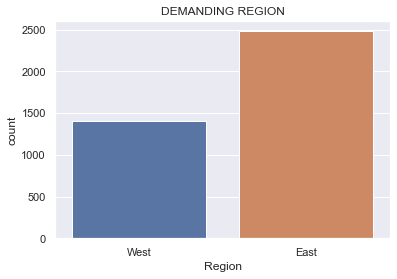

In [62]:
sns.set(style="darkgrid")                     #which region like our producst most
REGION = sns.countplot(x="Region", data =all_data).set_title("DEMANDING REGION")

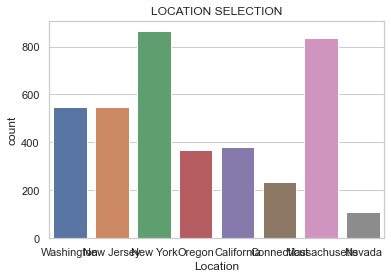

In [92]:
sns.set(style="whitegrid")                   #wana open branch in lew location
NEW_BRANCH = sns.countplot(x="Location",data =all_data).set_title("LOCATION SELECTION")

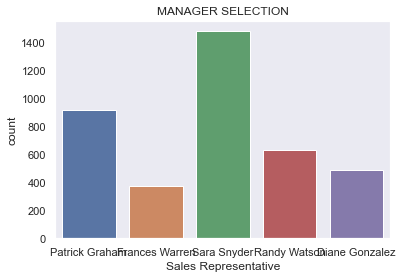

In [64]:
sns.set(style="dark")                   #wana know who is wrokign more efficiently
EMPOLYE= sns.countplot(x="Sales Representative", data =all_data).set_title("MANAGER SELECTION")

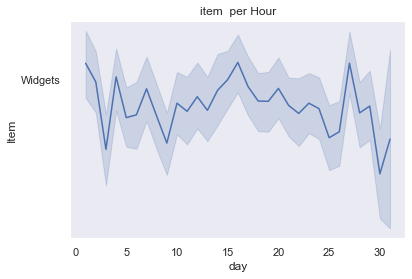

In [73]:
genderCount = sns.lineplot(x="day",  y = 'Item',data =all_data).set_title("item  per Hour")

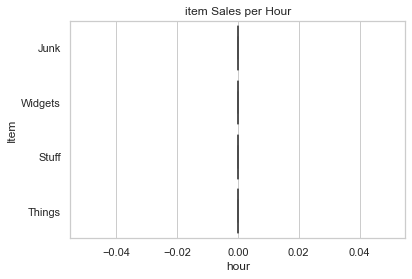

In [97]:
genderCount = sns.boxplot(x="hour",  y = 'Item',data =all_data).set_title("item Sales per Hour")

Text(0.5, 1.0, 'item demand')

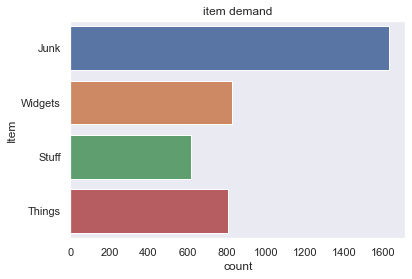

In [86]:
sns.countplot(y="Item", data=all_data).set_title("item demand")

Text(0.5, 1.0, 'item price')

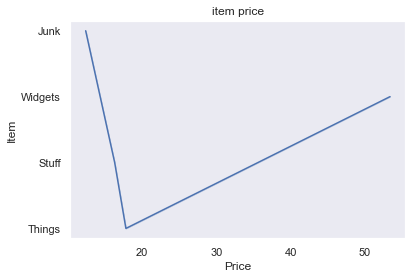

In [89]:
sns.lineplot(y="Item",x="Price", data=all_data).set_title("item price")


<AxesSubplot:xlabel='Customer', ylabel='Total Sale Amount'>

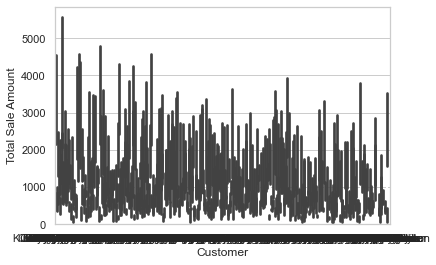

In [99]:
sns.barplot(x="Customer", y="Total Sale Amount", estimator = sum, data=all_data)